In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
print('Training data shape:', train_X.shape, train_Y.shape)
print('Testing data shape:', test_X.shape, test_Y.shape)

4431872/4422102 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


# output 종류 및 형태 확인

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs:', nClasses)
print('Output classes:', classes)

Total number of outputs: 10
Output classes: [0 1 2 3 4 5 6 7 8 9]


# 샘플 데이터 확인

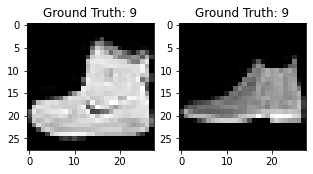

In [ ]:
plt.figure(figsize=[5, 5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0, :, :], cmap='gray')
plt.title("Ground Truth: {}".format(train_Y[0]))

plt.subplot(122)
plt.imshow(test_X[0, :, :], cmap='gray')
plt.title("Ground Truth: {}".format(test_Y[0]))

plt.show()

# 데이터 채널 추가

In [ ]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# 데이터 정규화

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# 원핫인코딩

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot,
                                                              test_size=0.2, random_state=13)
train_X.shape, valid_X.shape, train_label.shape, valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

# 모델 정의

In [ ]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28, 28, 1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['acc'])

fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

# 모델 학습

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label,
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  validation_data=(valid_X, valid_label))

test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test acc:', test_eval[1])

Epoch 1/20
750/750 [==============================] - 34s 6ms/step - loss: 0.6814 - acc: 0.7510 - val_loss: 0.3354 - val_acc: 0.8804
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3057 - acc: 0.8882 - val_loss: 0.3076 - val_acc: 0.8848
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2410 - acc: 0.9102 - val_loss: 0.2489 - val_acc: 0.9080
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2093 - acc: 0.9229 - val_loss: 0.2579 - val_acc: 0.9042
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1858 - acc: 0.9301 - val_loss: 0.2480 - val_acc: 0.9127
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1591 - acc: 0.9424 - val_loss: 0.2294 - val_acc: 0.9208
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1351 - acc: 0.9490 - val_loss: 0.2264 - val_acc: 0.9215
Epoch 8/20
750/750 [==============================] - 4s 5ms/step - loss: 0

# 모델 성능 확인

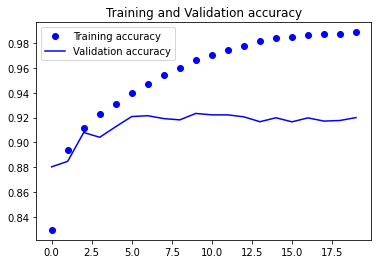

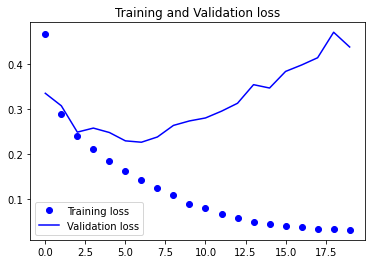

In [ ]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()